In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import onnxruntime as rt
import onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import to_onnx
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('../data/whole_dataset.csv')
data_description = pd.read_csv('../data/data_description.csv', encoding='iso-8859-1')
feature_name = data_description['Feature (nl)']
relative_importance = data_description['Relative importance']

# most top 30 important features
relevant_features = data_description.nlargest(30, 'Relative importance')
# print relative importance and feature name
print(relevant_features[['Feature (en)', 'Relative importance']])

top_30_features = relevant_features['Feature (nl)'].tolist()
data_top_30 = data[top_30_features]

                                          Feature (en)  Relative importance
216                        person_age_at_investigation           100.000000
290        relationship_other_current_form_cost_sharer            35.485674
140                           contacts_subject_no_show            27.874802
90                          competence_expertise_apply            25.106633
142          contacts_subject_consultation_with_income            24.101367
4                              address_days_at_address            23.329141
299                     relationship_other_cost_sharer            20.748950
276                            pla_history_development            19.111295
181               instrument_ladder_current_activation            17.504787
155          contacts_type_last_year_document_outgoing            15.413835
219  personal_qualities_days_since_language_require...            15.153846
218                personal_qualities_days_since_input            14.928516
206  exempti

In [ ]:
#load the dataset
data = pd.read_csv('../data/whole_dataset.csv')
data_description = pd.read_csv('../data/data_description.csv', encoding='iso-8859-1')
feature_name = data_description['Feature (nl)']
relative_importance = data_description['Relative importance']

# most top 30 important features
relevant_features = data_description.nlargest(30, 'Relative importance')
top_30_features = relevant_features['Feature (nl)'].tolist()
data_top_30 = data[top_30_features]

sns.set(style="whitegrid")

plt.figure(figsize=(30, 100))

for i, feature in enumerate(top_30_features):
    plt.subplot(10, 3, i+1) 
    sns.histplot(data_top_30[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}', fontsize=20)

plt.tight_layout()
plt.savefig('../images/initial_data_distribution.png')
plt.show()

In [3]:
from sdv.tabular import GaussianCopula
model = GaussianCopula.load('../generator/GaussianCopula-generator.pkl')
synth_data = model.sample(num_rows=100000, randomize_samples=1)
print(synth_data.shape)
synth_data.to_csv('../data/data_300k.csv', index=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

Sampling rows: 100%|██████████| 100000/100000 [13:03<00:00, 127.71it/s]


(100000, 315)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
data = pd.read_csv('../data/new_data.csv')
data_description = pd.read_csv('../data/data_description.csv', encoding='iso-8859-1')
feature_name = data_description['Feature (nl)']
relative_importance = data_description['Relative importance']

# most top 30 important features
relevant_features = data_description.nlargest(30, 'Relative importance')
top_30_features = relevant_features['Feature (nl)'].tolist()
data_top_30 = data[top_30_features]

sns.set(style="whitegrid")

plt.figure(figsize=(30, 100))

for i, feature in enumerate(top_30_features):
    plt.subplot(10, 3, i+1) 
    sns.histplot(data_top_30[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}', fontsize=20)

plt.tight_layout()
plt.savefig('../images/synthetic_data_distribution.png')
plt.show()

In [21]:
# read the data from 'whole_dataset.csv'
import pandas as pd
data = pd.read_csv('../data/whole_dataset.csv')
# find the data whose 'checked' is true and has the lowest 'Ja' value
pos = data[(data['checked'] == True)]
print(pos['Ja'].min())

0.697021996059818


In [24]:
import numpy as np
# load the dataset
data_100k = pd.read_csv('../data/data_100k_labeled.csv')
data_200k = pd.read_csv('../data/data_200k_labeled.csv')
data_300k = pd.read_csv('../data/data_300k_labeled.csv')
td_synth_threshold = 0.6970136
# create a new column 'checked' 0 for 'Ja' columne higher than td_synth_threshold
data_100k['checked'] = np.where(data_100k['Ja'] > td_synth_threshold, 1, 0)
data_200k['checked'] = np.where(data_200k['Ja'] > td_synth_threshold, 1, 0)
data_300k['checked'] = np.where(data_300k['Ja'] > td_synth_threshold, 1, 0)
# combine the data and remove the duplicate
data = pd.concat([data_100k, data_200k, data_300k])
data = data.drop_duplicates()
print(data.shape)
# save the data to 'combined_dataset.csv'
data.to_csv('../data/combined_dataset.csv', index=False)

(300000, 318)


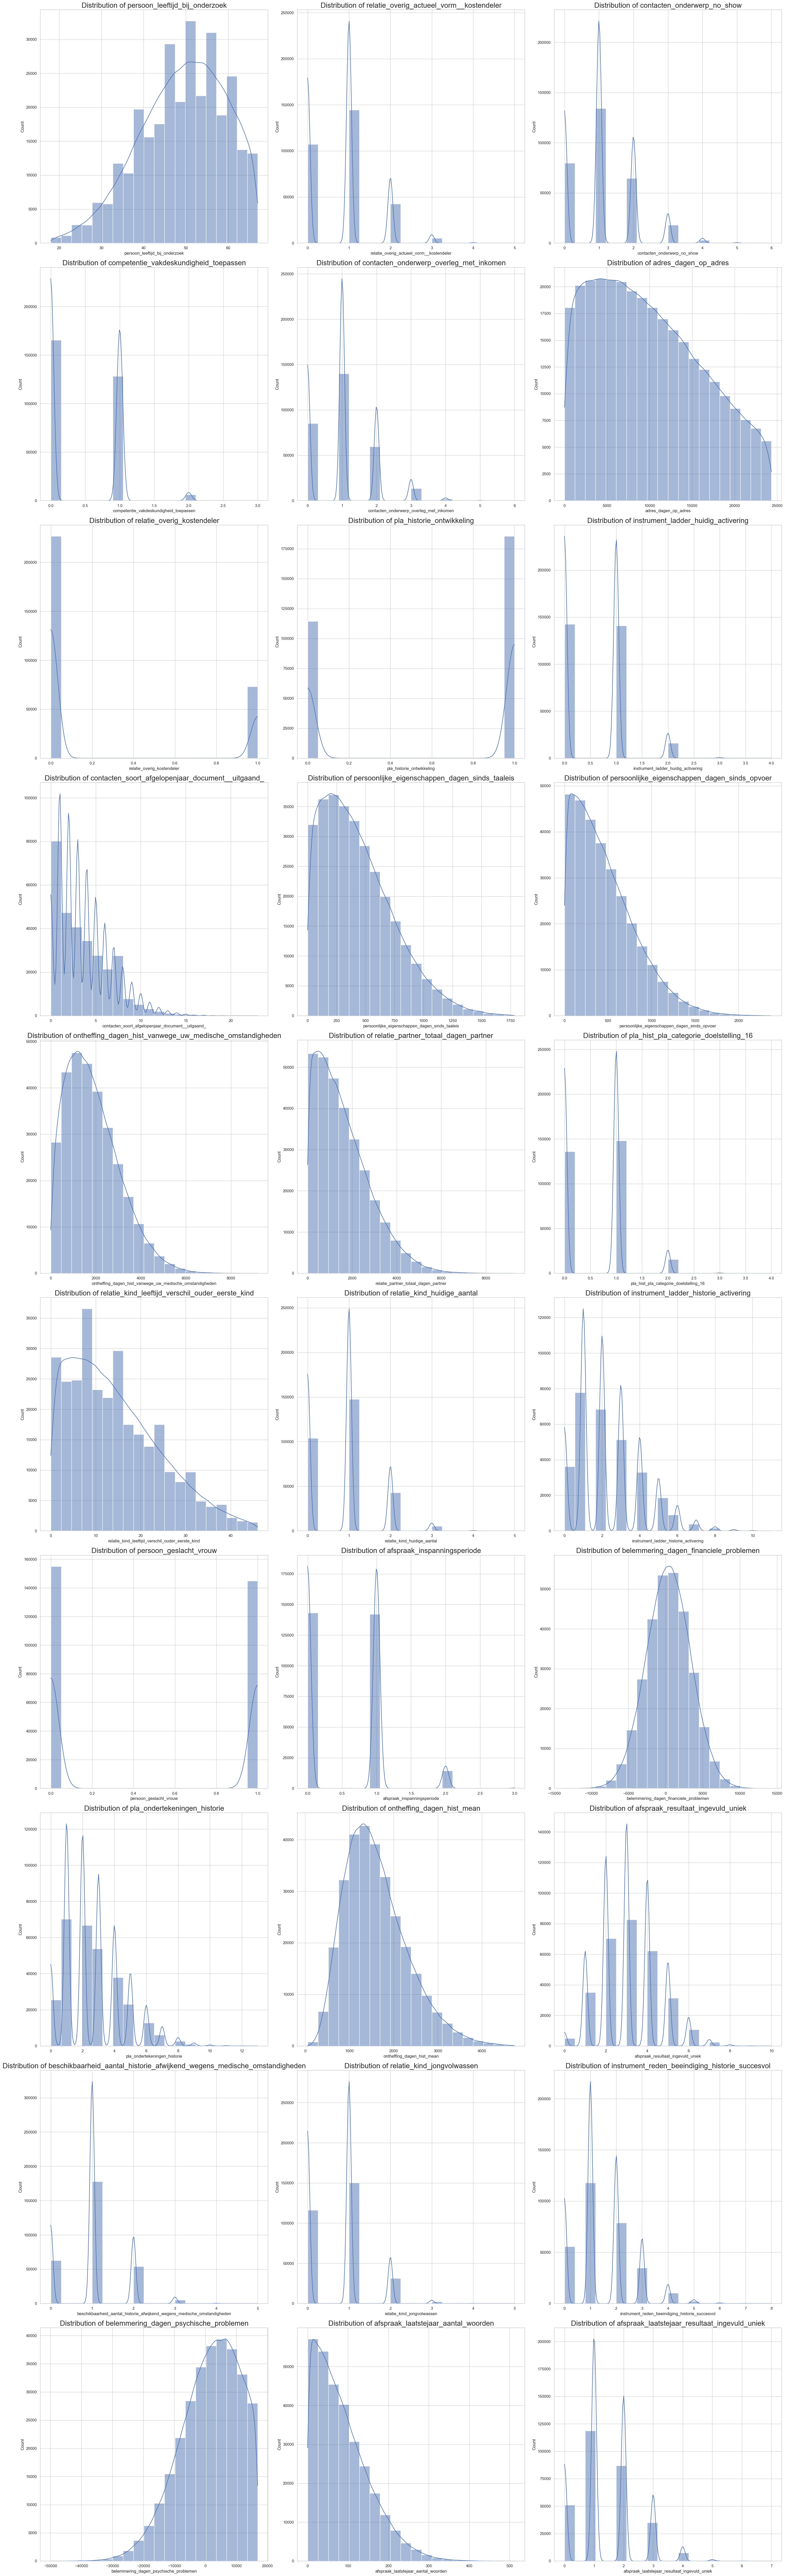

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#load the dataset
data = pd.read_csv('../data/combined_dataset.csv')
data_description = pd.read_csv('../data/data_description.csv', encoding='iso-8859-1')
feature_name = data_description['Feature (nl)']
relative_importance = data_description['Relative importance']

# most top 30 important features
relevant_features = data_description.nlargest(30, 'Relative importance')
top_30_features = relevant_features['Feature (nl)'].tolist()
data_top_30 = data[top_30_features]

sns.set(style="whitegrid")

plt.figure(figsize=(30, 100))

for i, feature in enumerate(top_30_features):
    plt.subplot(10, 3, i+1) 
    sns.histplot(data_top_30[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}', fontsize=20)

plt.tight_layout()
plt.savefig('../images/combined_data_distribution.png')
plt.show()